# K-Means Clustering

The k-means clustering algorithm attempts to split a given anonymous data set (a set containing no information as to class identity) into a fixed number (k) of clusters. Initially k number of so called centroids are chosen. ... Each centroid is thereafter set to the arithmetic mean of the cluster it defines.
To use: from scipy.spatial.distance import cdist////
from sklearn.cluster import KMeans////   from sklearn.decomposition import PCA


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame,Series

%matplotlib inline

In [2]:
df=pd.read_csv("Health.csv")

In [3]:
df.head()

,BIO_SEX,age,TREG1,ALCEVR1,ALCPROBS1,marever1,cocever1,inhever1,cigavail,DEP1,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
0,2.0,NaN,0.0,1.0,2,1,0,0,0.0,10.0,47.0,4.0,0,5.0,NaN,NaN,0.0,24.3,8.0,15.0
1,2.0,19.427397,1.0,1.0,1,0,0,0,1.0,17.0,35.0,1.0,0,5.0,22.0,2.333333,0.0,23.3,9.0,15.0
2,1.0,NaN,0.0,0.0,0,0,0,0,0.0,2.0,45.0,0.0,0,1.0,30.0,2.250000,0.0,24.3,3.0,15.0
3,1.0,20.430137,1.0,0.0,0,1,1,1,1.0,19.0,47.0,4.0,1,4.0,19.0,2.000000,0.0,18.7,6.0,14.0
4,2.0,NaN,0.0,1.0,0,0,0,0,0.0,6.0,39.0,0.0,0,5.0,32.0,3.000000,0.0,20.0,9.0,6.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6504 entries, 0 to 6503
Data columns (total 20 columns):
BIO_SEX      6503 non-null float64
age          4837 non-null float64
TREG1        6500 non-null float64
ALCEVR1      6444 non-null float64
ALCPROBS1    6504 non-null int64
marever1     6504 non-null int64
cocever1     6504 non-null int64
inhever1     6504 non-null int64
cigavail     6444 non-null float64
DEP1         6486 non-null float64
ESTEEM1      6483 non-null float64
VIOL1        6454 non-null float64
PASSIST      6504 non-null int64
DEVIANT1     6448 non-null float64
SCHCONN1     6368 non-null float64
GPA1         6274 non-null float64
EXPEL1       6486 non-null float64
FAMCONCT     6504 non-null float64
PARACTV      6477 non-null float64
PARPRES      6369 non-null float64
dtypes: float64(15), int64(5)
memory usage: 1016.3 KB


In [5]:
corr_matrix=df.corr()

In [6]:
corr_matrix["age"].sort_values(ascending=False)

age          1.000000
ALCEVR1      0.248955
marever1     0.209185
ALCPROBS1    0.179375
TREG1        0.167442
DEVIANT1     0.134465
DEP1         0.132768
cigavail     0.101452
EXPEL1       0.073316
cocever1     0.070692
VIOL1        0.019225
PASSIST      0.000006
inhever1    -0.002669
BIO_SEX     -0.059423
SCHCONN1    -0.064633
PARACTV     -0.068883
PARPRES     -0.072155
ESTEEM1     -0.095360
GPA1        -0.133128
FAMCONCT    -0.190858
Name: age, dtype: float64

In [7]:
df["age"]=df["age"].fillna((df['age'].mean()))

In [8]:
df.head()

,BIO_SEX,age,TREG1,ALCEVR1,ALCPROBS1,marever1,cocever1,inhever1,cigavail,DEP1,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
0,2.0,16.541548,0.0,1.0,2,1,0,0,0.0,10.0,47.0,4.0,0,5.0,NaN,NaN,0.0,24.3,8.0,15.0
1,2.0,19.427397,1.0,1.0,1,0,0,0,1.0,17.0,35.0,1.0,0,5.0,22.0,2.333333,0.0,23.3,9.0,15.0
2,1.0,16.541548,0.0,0.0,0,0,0,0,0.0,2.0,45.0,0.0,0,1.0,30.0,2.250000,0.0,24.3,3.0,15.0
3,1.0,20.430137,1.0,0.0,0,1,1,1,1.0,19.0,47.0,4.0,1,4.0,19.0,2.000000,0.0,18.7,6.0,14.0
4,2.0,16.541548,0.0,1.0,0,0,0,0,0.0,6.0,39.0,0.0,0,5.0,32.0,3.000000,0.0,20.0,9.0,6.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6504 entries, 0 to 6503
Data columns (total 20 columns):
BIO_SEX      6503 non-null float64
age          6504 non-null float64
TREG1        6500 non-null float64
ALCEVR1      6444 non-null float64
ALCPROBS1    6504 non-null int64
marever1     6504 non-null int64
cocever1     6504 non-null int64
inhever1     6504 non-null int64
cigavail     6444 non-null float64
DEP1         6486 non-null float64
ESTEEM1      6483 non-null float64
VIOL1        6454 non-null float64
PASSIST      6504 non-null int64
DEVIANT1     6448 non-null float64
SCHCONN1     6368 non-null float64
GPA1         6274 non-null float64
EXPEL1       6486 non-null float64
FAMCONCT     6504 non-null float64
PARACTV      6477 non-null float64
PARPRES      6369 non-null float64
dtypes: float64(15), int64(5)
memory usage: 1016.3 KB


In [10]:
df.dropna(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6107 entries, 1 to 6503
Data columns (total 20 columns):
BIO_SEX      6107 non-null float64
age          6107 non-null float64
TREG1        6107 non-null float64
ALCEVR1      6107 non-null float64
ALCPROBS1    6107 non-null int64
marever1     6107 non-null int64
cocever1     6107 non-null int64
inhever1     6107 non-null int64
cigavail     6107 non-null float64
DEP1         6107 non-null float64
ESTEEM1      6107 non-null float64
VIOL1        6107 non-null float64
PASSIST      6107 non-null int64
DEVIANT1     6107 non-null float64
SCHCONN1     6107 non-null float64
GPA1         6107 non-null float64
EXPEL1       6107 non-null float64
FAMCONCT     6107 non-null float64
PARACTV      6107 non-null float64
PARPRES      6107 non-null float64
dtypes: float64(15), int64(5)
memory usage: 1001.9 KB


In [12]:
df.columns=map(str.upper,df.columns)

In [13]:
df.head()

,BIO_SEX,AGE,TREG1,ALCEVR1,ALCPROBS1,MAREVER1,COCEVER1,INHEVER1,CIGAVAIL,DEP1,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
1,2.0,19.427397,1.0,1.0,1,0,0,0,1.0,17.0,35.0,1.0,0,5.0,22.0,2.333333,0.0,23.3,9.0,15.0
2,1.0,16.541548,0.0,0.0,0,0,0,0,0.0,2.0,45.0,0.0,0,1.0,30.0,2.250000,0.0,24.3,3.0,15.0
3,1.0,20.430137,1.0,0.0,0,1,1,1,1.0,19.0,47.0,4.0,1,4.0,19.0,2.000000,0.0,18.7,6.0,14.0
4,2.0,16.541548,0.0,1.0,0,0,0,0,0.0,6.0,39.0,0.0,0,5.0,32.0,3.000000,0.0,20.0,9.0,6.0
5,1.0,14.509589,0.0,0.0,0,0,0,0,0.0,8.0,41.0,3.0,0,0.0,27.0,2.666667,0.0,23.7,3.0,13.0


In [14]:
cluster = df[['ALCEVR1','ALCPROBS1','MAREVER1','DEP1','ESTEEM1','VIOL1','DEVIANT1','SCHCONN1','FAMCONCT','PARACTV','PARPRES']]

In [15]:
cluster.head()

,ALCEVR1,ALCPROBS1,MAREVER1,DEP1,ESTEEM1,VIOL1,DEVIANT1,SCHCONN1,FAMCONCT,PARACTV,PARPRES
1,1.0,1,0,17.0,35.0,1.0,5.0,22.0,23.3,9.0,15.0
2,0.0,0,0,2.0,45.0,0.0,1.0,30.0,24.3,3.0,15.0
3,0.0,0,1,19.0,47.0,4.0,4.0,19.0,18.7,6.0,14.0
4,1.0,0,0,6.0,39.0,0.0,5.0,32.0,20.0,9.0,6.0
5,0.0,0,0,8.0,41.0,3.0,0.0,27.0,23.7,3.0,13.0


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc=StandardScaler()

In [18]:
scaler=sc.fit(cluster)

In [19]:
scaled_data=scaler.transform(cluster)

In [20]:
data=pd.DataFrame(scaled_data,columns=cluster.columns)

In [21]:
data.head()

,ALCEVR1,ALCPROBS1,MAREVER1,DEP1,ESTEEM1,VIOL1,DEVIANT1,SCHCONN1,FAMCONCT,PARACTV,PARPRES
0,0.907785,0.642730,-0.593803,1.253183,-1.097542,-0.225991,0.650568,-1.234895,0.300806,0.833818,0.766659
1,-1.101582,-0.422729,-0.593803,-0.997093,0.760239,-0.612147,-0.491761,0.325282,0.678576,-0.958133,0.766659
2,-1.101582,-0.422729,1.684059,1.553220,1.131796,0.932480,0.364986,-1.819961,-1.436937,-0.062157,0.296249
3,0.907785,-0.422729,-0.593803,-0.397019,-0.354430,-0.612147,0.650568,0.715326,-0.945836,0.833818,-3.467025
4,-1.101582,-0.422729,-0.593803,-0.096983,0.017127,0.546323,-0.777343,-0.259785,0.451914,-0.958133,-0.174160


In [22]:
#lets do KMeans cluster analysis for 1 to 10 clusters
from sklearn.model_selection import train_test_split

In [23]:
cluster_train,cluster_test=train_test_split(data,test_size=0.2,random_state=123)

In [24]:
cluster_train.shape

(4885, 11)

In [25]:
cluster_test.shape

(1222, 11)

In [26]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

In [27]:
clusters = range(1,21)
mean_dist=[]

In [28]:
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(cluster_train)
    mean_dist.append(sum(np.min(cdist(cluster_train,model.cluster_centers_,'euclidean'),axis=1))/cluster_train.shape[0])

Text(0.5, 1.0, 'Elbow method for k values')

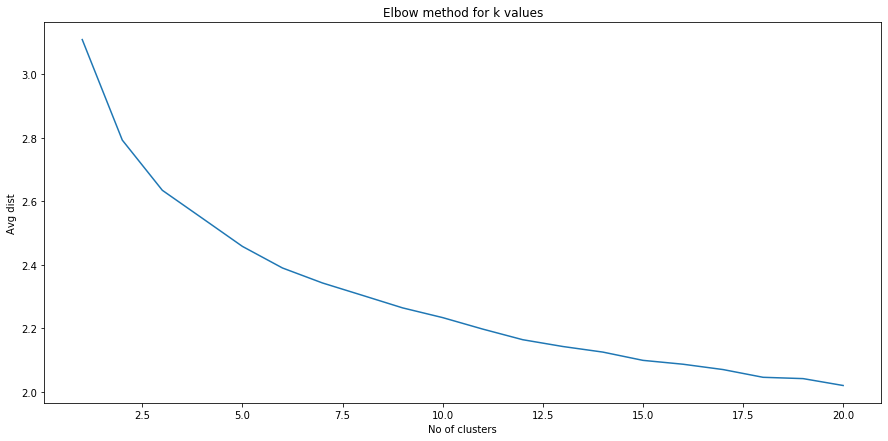

In [29]:
plt.figure(figsize=(15,7))
plt.plot(clusters,mean_dist)
plt.xlabel('No of clusters')
plt.ylabel('Avg dist')
plt.title('Elbow method for k values')


In [30]:
from sklearn.decomposition import PCA

In [31]:
model1=KMeans(n_clusters=3)
model1.fit(cluster_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [32]:
pca=PCA(2)

In [33]:
reduced_model=pca.fit_transform(cluster_train)

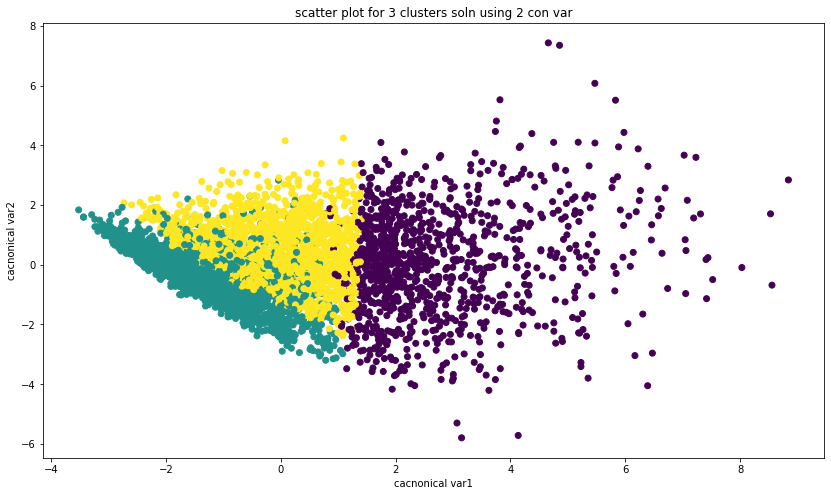

In [34]:
plt.figure(figsize=(14,8))
plt.scatter(x=reduced_model[:,0],y=reduced_model[:,1],c=model1.labels_)
plt.xlabel('cacnonical var1')
plt.ylabel('cacnonical var2')
plt.title('scatter plot for 3 clusters soln using 2 con var')
plt.show()

It can be seen that cluster are formed but the data points are overlaping each other. So a lot of points are mis-classified

In [35]:
model2=KMeans(n_clusters=2)
model2.fit(cluster_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

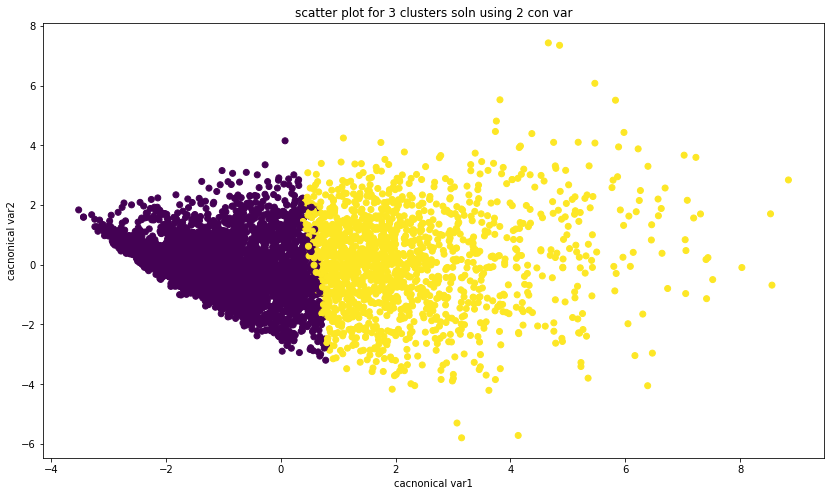

In [36]:
plt.figure(figsize=(14,8))
plt.scatter(x=reduced_model[:,0],y=reduced_model[:,1],c=model2.labels_)
plt.xlabel('cacnonical var1')
plt.ylabel('cacnonical var2')
plt.title('scatter plot for 3 clusters soln using 2 con var')
plt.show()

Hence with reduced number of groups the clusters are better formed and very minimum overlapping data